In [2]:
#1. Load and prep data

import pandas as pd
import os

#Create dataframe
movies = pd.read_csv("Movie-Ratings.csv")

#Clean up columns
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating'\
                  ,'BudgetMillions', 'Year']

#Clean up datatypes
movies.Film = movies.Film.astype('category')
movies.Genre = movies.Genre.astype('category')
movies.Year = movies.Year.astype('category')

In [3]:
#2. Import data viz libraries

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

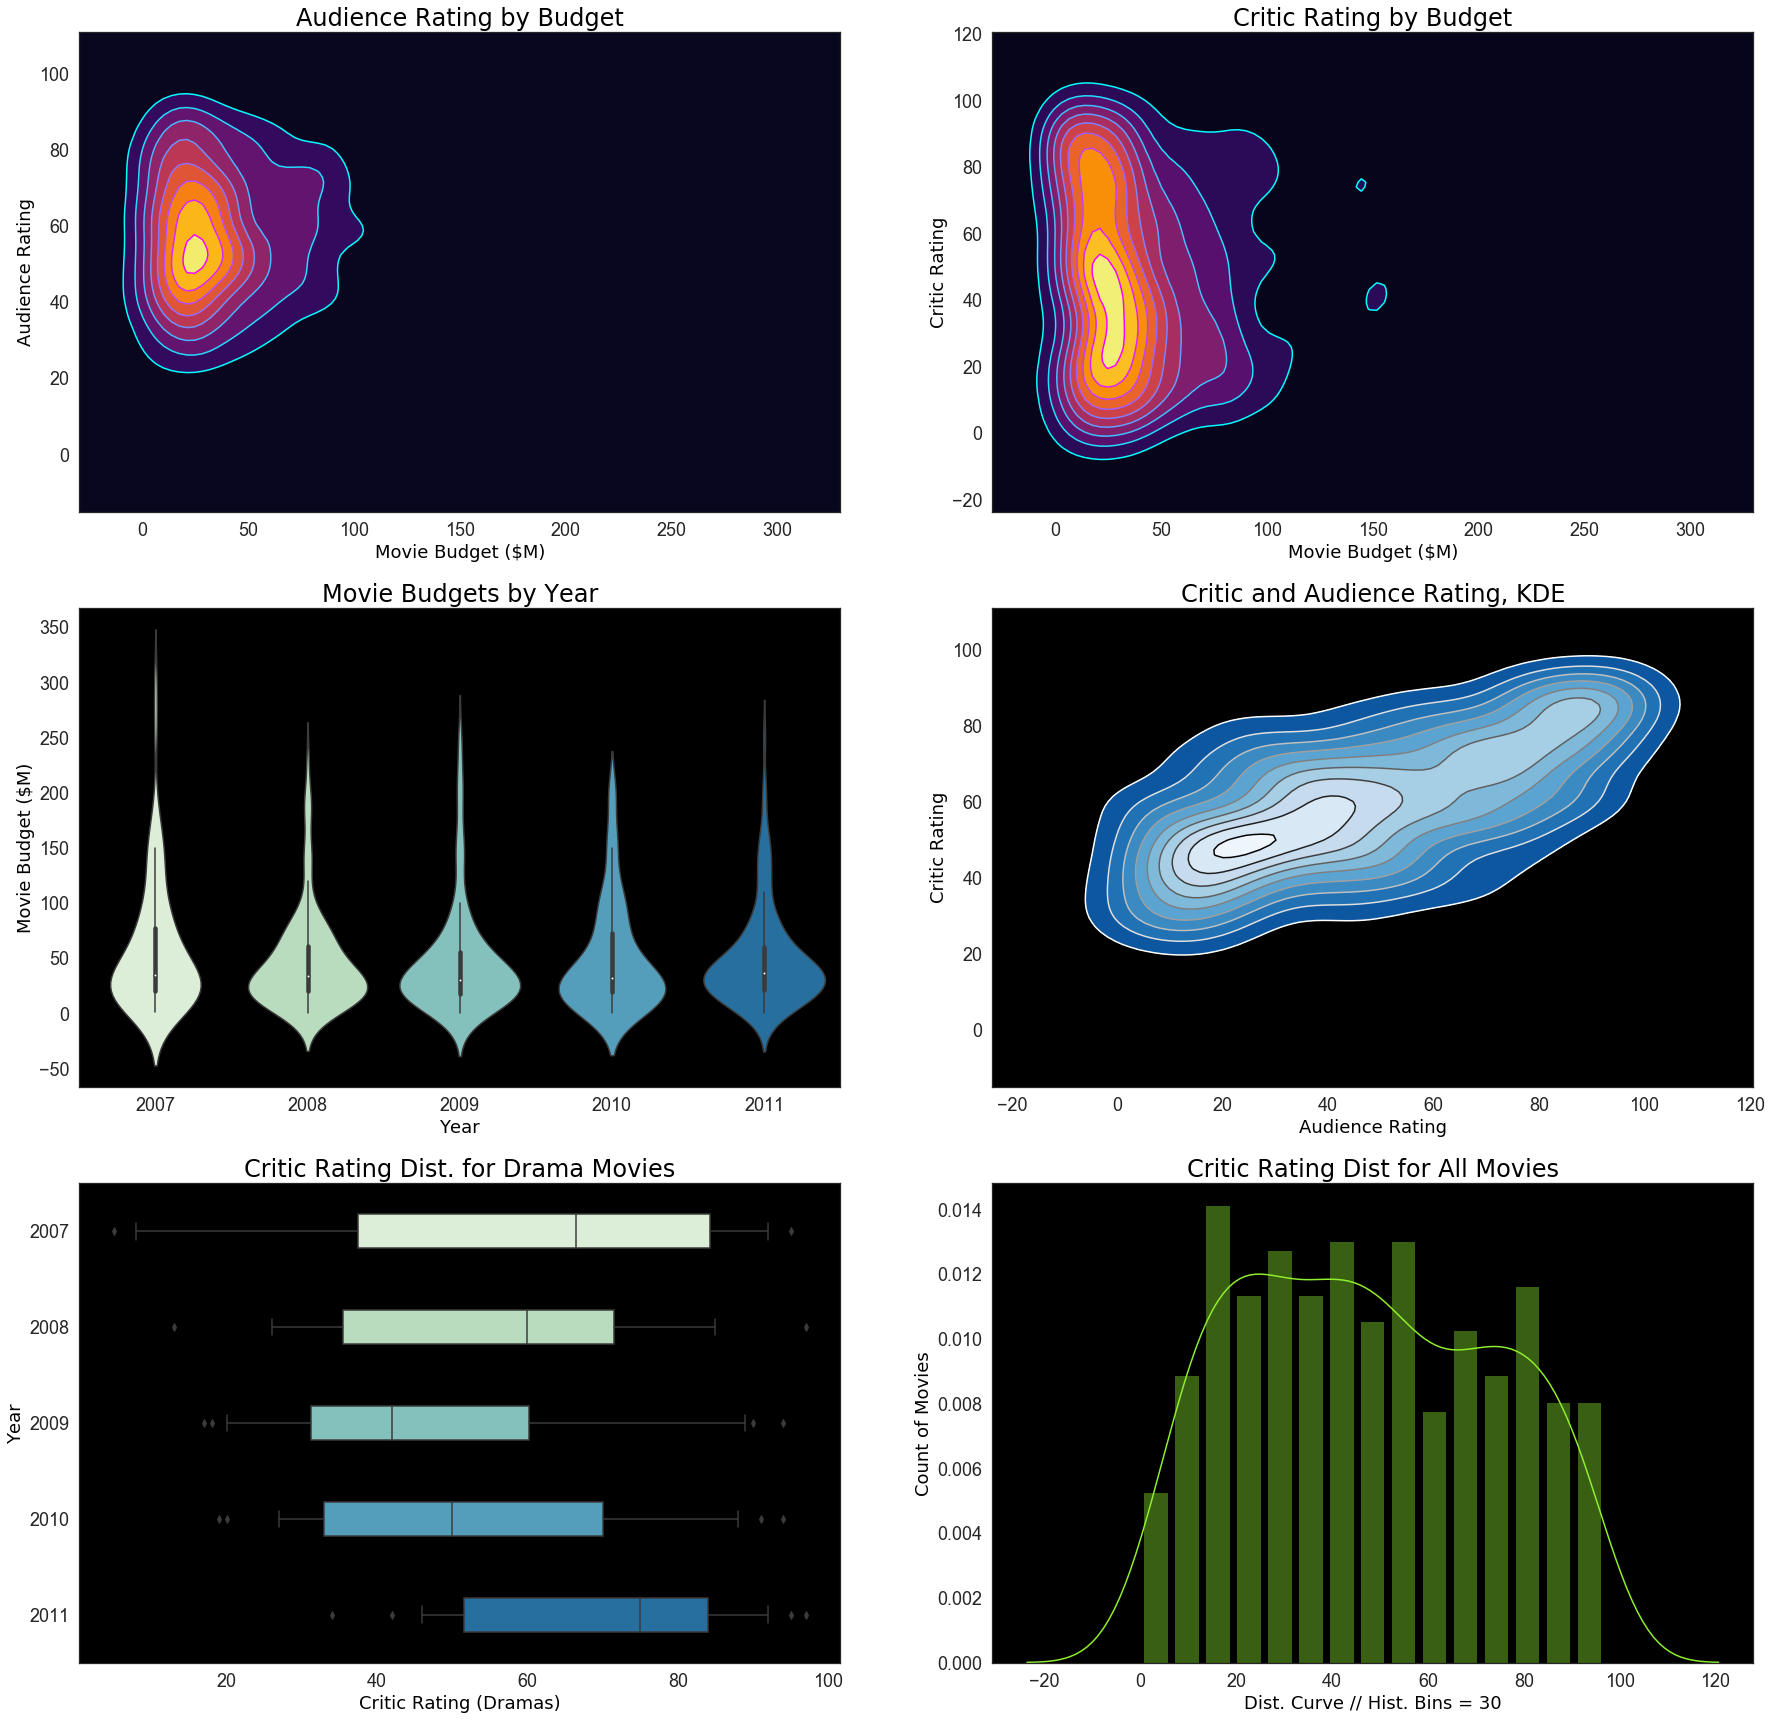

In [4]:
#3. Build awesome viz

sns.set_style('white', {'axes.facecolor': "black"})
figure, axes = plt.subplots(3,2, figsize=(30,30))

#Plot[0,0]

k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, \
                 shade=True, shade_lowest=True, cmap='inferno',
                ax=axes[0,0])

k1b = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, \
                 cmap='cool', ax=axes[0,0])

#-----FORMATTING-----#
k1.set_title("Audience Rating by Budget", fontsize=24, color='Black', fontname='Roboto')

k1.set_xlabel("Movie Budget ($M)", fontsize=18, color='Black', fontname='Roboto')
k1.set_ylabel("Audience Rating", fontsize=18, color='Black', fontname='Roboto')
k1.tick_params(axis='both',**{'labelsize':18,'pad':10})


#Plot[0,1]

k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, \
                shade=True, shade_lowest=True, cmap='inferno',\
                ax=axes[0,1])

k2b = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, 
                cmap='cool', ax=axes[0,1])

#-----FORMATTING-----#
k2.set_title("Critic Rating by Budget", fontsize=24, \
         color='Black', fontname='Roboto')
k2.set_ylabel("Critic Rating", fontsize=18, color='Black', fontname='Roboto')
k2.set_xlabel("Movie Budget ($M)", fontsize=18, color='Black', fontname='Roboto')
k2.tick_params(axis='both',**{'labelsize':18,'pad':10})

#Plot[1,0]

z = sns.violinplot(data=movies, x='Year', y='BudgetMillions',\
                   palette='GnBu',ax=axes[1,0])

#-----FORMATTING-----#
z.set_title("Movie Budgets by Year", fontsize=24, \
         color='Black', fontname='Roboto')
z.set_ylabel("Movie Budget ($M)", fontsize=18, color='Black', fontname='Roboto')
z.set_xlabel("Year", fontsize=18, color='Black', fontname='Roboto')
z.tick_params(axis='both',**{'labelsize':18,'pad':10})


#Plot[1,1]

k4 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
                shade=True, shade_lowest=False, cmap='Blues_r',\
                ax=axes[1,1])

k4b = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
                 cmap='gist_gray_r', ax=axes[1,1])

#-----FORMATTING-----#
k4.set_title("Critic and Audience Rating, KDE", fontsize=24, \
         color='Black', fontname='Roboto')
k4.set_ylabel("Critic Rating", fontsize=18, color='Black', fontname='Roboto')
k4.set_xlabel("Audience Rating", fontsize=18, color='Black', fontname='Roboto')
k4.tick_params(axis='both',**{'labelsize':18,'pad':10})

#Plot[2,0]

w1 = sns.boxplot(data=movies[movies.Genre=='Drama'], y='Year', orient='h',\
                 palette='GnBu', x='CriticRating', ax=axes[2,0], **{'whis':[5,95], \
                'meanline':True, 'width':.35})

#-----FORMATTING-----#
w1.set_title("Critic Rating Dist. for Drama Movies", fontsize=24, \
         color='Black', fontname='Roboto')
w1.set_ylabel("Year", fontsize=18, color='Black', fontname='Roboto')
w1.set_xlabel("Critic Rating (Dramas)", fontsize=18, color='Black', fontname='Roboto')
w1.tick_params(axis='both',**{'labelsize':18,'pad':10})

#Plot[2,1]
m2 = sns.distplot(movies.CriticRating, hist=True, hist_kws={'rwidth':.75}, \
                  bins=15, ax=axes[2,1], color='#8FEF2E')

#-----FORMATTING-----#
m2.set_title("Critic Rating Dist for All Movies", fontsize=24, \
         color='Black', fontname='Roboto')
m2.set_ylabel("Count of Movies", fontsize=18, color='Black', fontname='Roboto')
m2.set_xlabel("Dist. Curve // Hist. Bins = 30", fontsize=18, color='Black', fontname='Roboto')
m2.tick_params(axis='both',**{'labelsize':18,'pad':10})

plt.show()

In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null category
Genre             559 non-null category
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null category
dtypes: category(3), int64(3)
memory usage: 40.3 KB
